Assignment:
For Learning Objective 1, you could pick a new data set and explore it, asking questions about them and seeking to answer it. Learning Objective 1: I can use the tools of the PyData stack to understand, interpret, and visualize datasets, including making arguments about its underlying distributions.

In [2]:
#Dataset: Digits (from sci-kit learn)
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn import datasets
from sklearn.linear_model import LinearRegression

diabetes = datasets.load_diabetes()

In [3]:
#Import data, convert it into a dataframe, print out a description of the data
X = diabetes.data

df = pd.DataFrame(X, columns=diabetes['feature_names'])

print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

Guiding Question: Whihch attribute has the strongest coorelation to disease progression(visually)

In [4]:
#Add disease progression column
df['Progression'] = diabetes['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


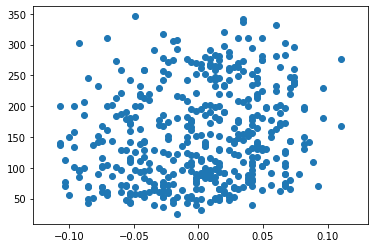

In [5]:
#Scatter Plot comparing age and progression to examine potential as an indicator of risk for disease
plt.scatter(df['age'], df['Progression'])

(array([25., 41., 34., 28., 23., 19., 11., 13.,  6.,  2.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <a list of 10 Patch objects>)

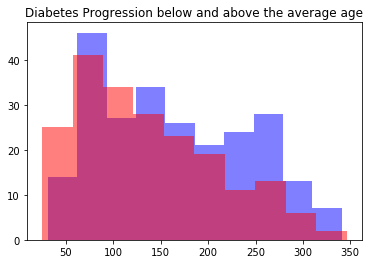

In [44]:
#Find the average age, plot a histogram contrasting progression in older people vs younger people
age_average = sum(df['age']) / 442
plt.title("Diabetes Progression below and above the average age")
plt.hist(df[df["age"] > age_average]["Progression"], alpha=0.5, color='b')
plt.hist(df[df["age"] < age_average]["Progression"], alpha=0.5, color='r')

In [43]:
#Acquiring data to be used in cell below to graph in a pie chart
df['age'].describe()

count    4.420000e+02
mean    -3.634285e-16
std      4.761905e-02
min     -1.072256e-01
25%     -3.729927e-02
50%      5.383060e-03
75%      3.807591e-02
max      1.107267e-01
Name: age, dtype: float64

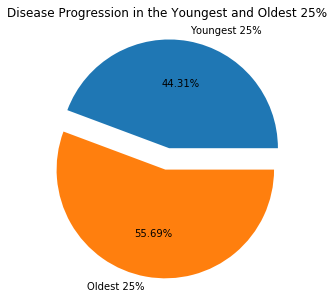

In [45]:
#Code from https://matplotlibguide.readthedocs.io/en/latest/Matplotlib/types.html used as background information and example
#Create a pie chart finding what % of people from each age group have the lowest progression
youngest25 = df['age'] < -3.729927e-02
youngest25_progression = sum(df['Progression'][youngest25]) / 111
oldest25 = df['age'] > 3.807591e-02
oldest25_progression = sum(df['Progression'][oldest25]) / 103
x = [youngest25_progression, oldest25_progression]
dataName = ['Youngest 25%', 'Oldest 25%']
explode = [0.1, 0.1] 

plt.figure(figsize=(5,5))
plt.title("Disease Progression in the Youngest and Oldest 25%")
plt.pie(x, explode=explode, labels=dataName, autopct='%.2f%%') 
plt.show()

The above histogram and pie chart indicate that age does not have a significant effect on the progression of diabetes, which I did not expect. The level of progression in the oldest 25% of the dataset is very similar to that of the youngest 25%, and the distribution of progression above and below the average age is the same.

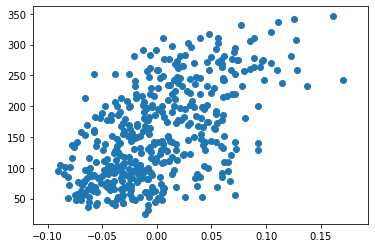

In [8]:
#Scatter plot comparing body mass index and progression to examine potential as an indicator of risk for disease
plt.scatter(df['bmi'], df['Progression'])

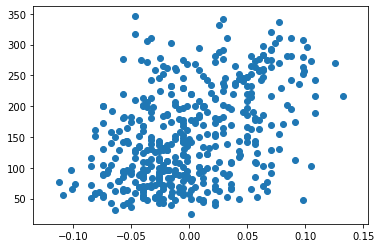

In [9]:
#Scatter plot comparing blood pressure and progression to examine potential as an indicator of risk for disease
plt.scatter(df['bp'], df['Progression'])

In [8]:
#caulculate average progression, BMI, and blood pressure and print it out
average_progression = sum(df['Progression']) / 442
average_BMI = sum(df['bmi']) / 442
average_BP = sum(df['bp']) / 442

print("Average progression:", average_progression, "\nAverage BMI:", average_BMI, "\nAverage BP:", average_BP)

Average progression: 152.13348416289594 
Average BMI: -8.045349203335693e-16 
Average BP: 1.2816545210746291e-16


According to the above scatter plots, BMI and blood pressure seem to have a relatively strong correlalation with progression. As a result, I believe a further analysis into BMI and blood pressure could be beneficial to determine their possible use as indicators of risk for Diabetes.